In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./AddisAbaba_AccidentsDataset/RTA_Dataset.csv')

In [3]:
#display the first 5 rows of the rta dataset
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [4]:
#display a concise summary about the RTA dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [5]:
#Display the total number of missing values for each column in RTA dataset
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64


<AxesSubplot:>

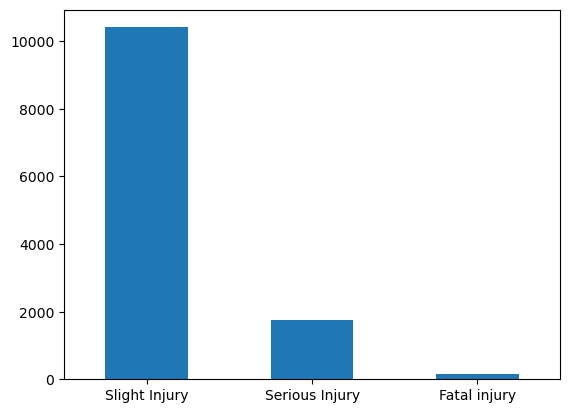

In [6]:
#Display the distribution of the values within the target variable of accident severity
print(df['Accident_severity'].value_counts())
df['Accident_severity'].value_counts().plot.bar(rot=0)

<AxesSubplot:>

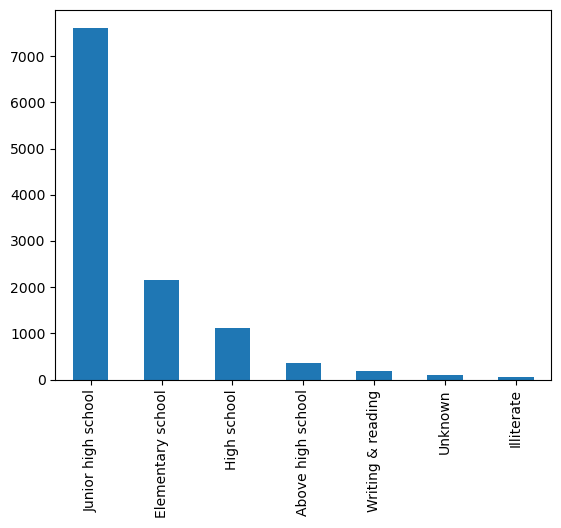

In [7]:
#Display the distribution of the level of education achieved by the drivers
df['Educational_level'].value_counts().plot.bar()

Asphalt roads                       11296
Earth roads                           358
Gravel roads                          242
Other                                 167
Asphalt roads with some distress       81
Name: Road_surface_type, dtype: int64


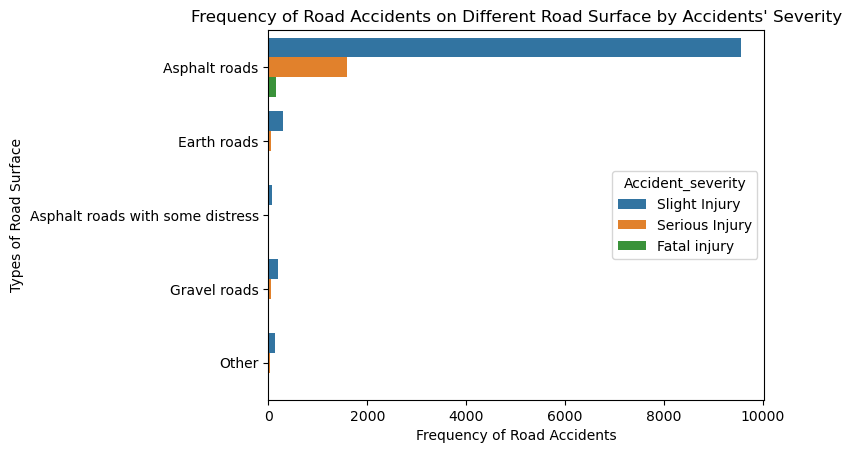

In [8]:
#display the count of road accidents by the type of road surface
print(df['Road_surface_type'].value_counts())

#display the count of road accidents by road surface type grouped by accidents' severity
sns.countplot(data=df, y='Road_surface_type', hue='Accident_severity')
plt.ylabel('Types of Road Surface')
plt.xlabel('Frequency of Road Accidents')
plt.title("Frequency of Road Accidents on Different Road Surface by Accidents' Severity")
plt.show()

Dry                     9340
Wet or damp             2904
Snow                      70
Flood over 3cm. deep       2
Name: Road_surface_conditions, dtype: int64


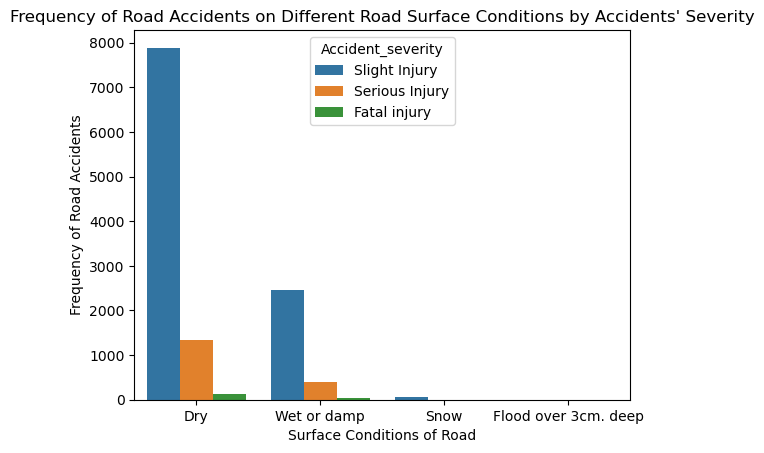

In [9]:
#display the count of road accidents by the surface conditions of the road
print(df['Road_surface_conditions'].value_counts())

#display the count of road accidents by road surface type grouped by accidents' severity
sns.countplot(data=df, x='Road_surface_conditions', hue='Accident_severity')
plt.xlabel('Surface Conditions of Road')
plt.ylabel('Frequency of Road Accidents')
plt.title("Frequency of Road Accidents on Different Road Surface Conditions by Accidents' Severity")
plt.show()

In [10]:
#Display pivot table that shows the count of road accidents based on road surface conditions with non blank road surface type
pivot_df = df.pivot_table(index='Road_surface_conditions', columns='Accident_severity', aggfunc='count')
fatal_df = pivot_df['Road_surface_type']
fatal_df.fillna(0, inplace=True)
fatal_df['Total Injury'] = fatal_df['Fatal injury'] + fatal_df['Serious Injury'] + fatal_df['Slight Injury']
fatal_df

C:\Users\Acer\AppData\Local\Temp\ipykernel_8576\871890756.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fatal_df.fillna(0, inplace=True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_8576\871890756.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fatal_df['Total Injury'] = fatal_df['Fatal injury'] + fatal_df['Serious Injury'] + fatal_df['Slight Injury']


Accident_severity,Fatal injury,Serious Injury,Slight Injury,Total Injury
Road_surface_conditions,,,,
Dry,121.0,1312.0,7774.0,9207.0
Flood over 3cm. deep,0.0,0.0,2.0,2.0
Snow,0.0,4.0,65.0,69.0
Wet or damp,36.0,404.0,2426.0,2866.0


In [11]:
#Display the percentage distribution of accidents' severity occured in dry road surface
fatal_df_dry = (fatal_df.loc['Dry'] / fatal_df.loc['Dry', 'Total Injury']) * 100
fatal_df_dry.name = '% Distribution of Road Accidents in Dry Road by Severity'
fatal_df_dry

Accident_severity
Fatal injury        1.314217
Serious Injury     14.250027
Slight Injury      84.435755
Total Injury      100.000000
Name: % Distribution of Road Accidents in Dry Road by Severity, dtype: float64

In [12]:
#Display the percentage distribution of accidents' severity occured in wet/damp road surface
fatal_df_wetdamp = (fatal_df.loc['Wet or damp'] / fatal_df.loc['Wet or damp', 'Total Injury']) * 100
fatal_df_wetdamp.name = '% Distribution of Road Accidents in Wet/Damp Road by Severity'
fatal_df_wetdamp

Accident_severity
Fatal injury        1.256106
Serious Injury     14.096301
Slight Injury      84.647592
Total Injury      100.000000
Name: % Distribution of Road Accidents in Wet/Damp Road by Severity, dtype: float64

In [13]:
#Display the percentage distribution of accidents' severity occured in snow road surface
fatal_df_snow = (fatal_df.loc['Snow'] / fatal_df.loc['Snow', 'Total Injury']) * 100
fatal_df_snow.name = '% Distribution of Road Accidents in Snow Road by Severity'
fatal_df_snow

Accident_severity
Fatal injury        0.000000
Serious Injury      5.797101
Slight Injury      94.202899
Total Injury      100.000000
Name: % Distribution of Road Accidents in Snow Road by Severity, dtype: float64

## Convert the values within 'time' variable into datetime format

In [14]:
df['Time'] = pd.to_datetime(df['Time'])

In [15]:
#Remove the time column from data frame after 'hour of day' column derived from it 
new_df = df.copy()
new_df['Hour_of_Day'] = new_df['Time'].dt.hour
new_df = new_df.drop(axis=1, columns='Time')
new_df

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour_of_Day
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,17
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,No defect,...,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,16
12312,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,No defect,...,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,18
12313,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,...,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury,13
12314,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,...,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury,13


In [16]:
categorical_columns = [col for col in new_df.columns if new_df[col].dtypes == 'object']
categorical_columns_for_vertical_bar_chart = [col for col in categorical_columns if (col != 'Accident_severity'
                                              and col != 'Type_of_vehicle' and col != 'Area_accident_occured' and
                                              col != 'Road_allignment' and col != 'Lanes_or_Medians' and col != 'Weather_conditions'
                                              and col != 'Type_of_collision' and col != 'Vehicle_movement' and col != 'Pedestrian_movement'
                                              and col != 'Cause_of_accident')
                                             ]
categorical_columns_for_vertical_bar_chart

['Day_of_week',
 'Age_band_of_driver',
 'Sex_of_driver',
 'Educational_level',
 'Vehicle_driver_relation',
 'Driving_experience',
 'Owner_of_vehicle',
 'Service_year_of_vehicle',
 'Defect_of_vehicle',
 'Types_of_Junction',
 'Road_surface_type',
 'Road_surface_conditions',
 'Light_conditions',
 'Casualty_class',
 'Sex_of_casualty',
 'Age_band_of_casualty',
 'Casualty_severity',
 'Work_of_casuality',
 'Fitness_of_casuality']

# Visualization of Categorical Data 


In [17]:
def barchartplot(col):
    
    #plot the count of accidents for the different values in each categorical columns grouped by accident severity
    ax = sns.countplot(x=col, hue='Accident_severity', data=new_df)
    plt.xlabel(f'{col}')
    plt.ylabel('Frequeny of Road Accidents')
    plt.xticks(rotation = 60)
    
    for container in ax.containers:
        ax.bar_label(container)
    
    plt.show()

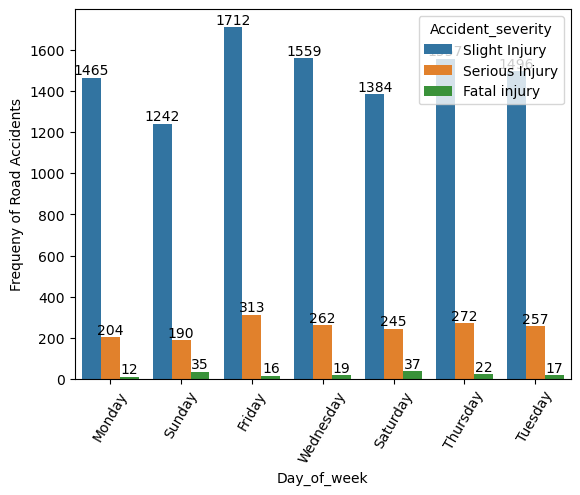

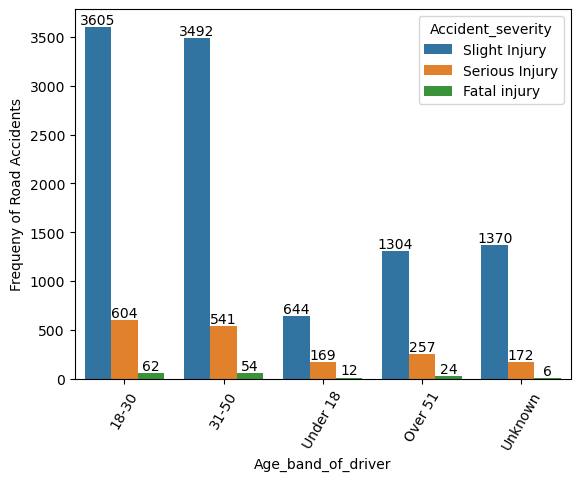

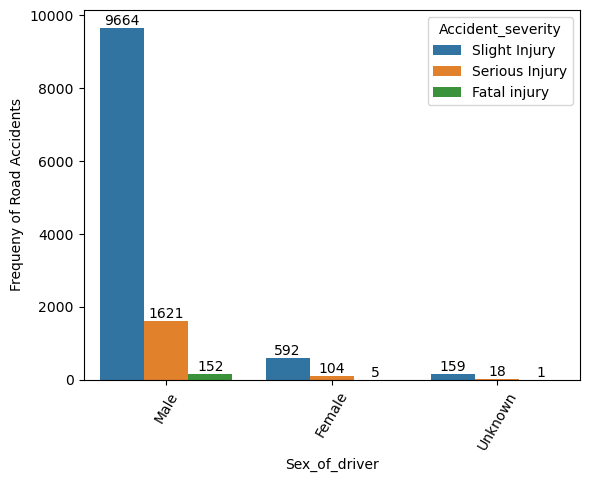

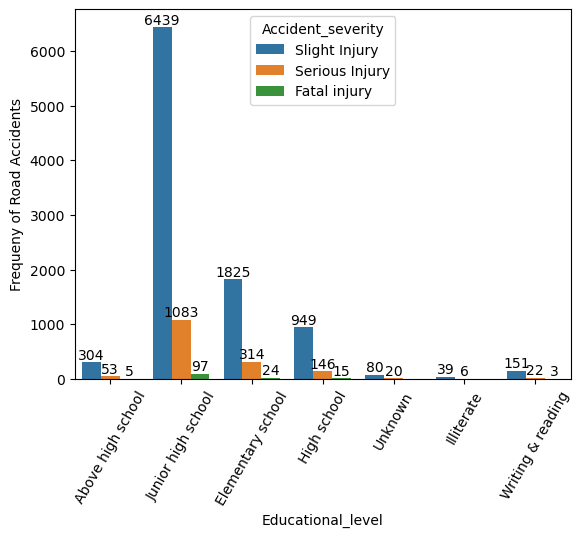

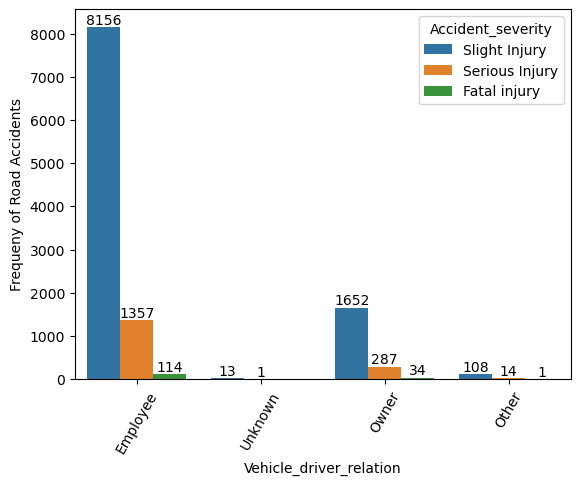

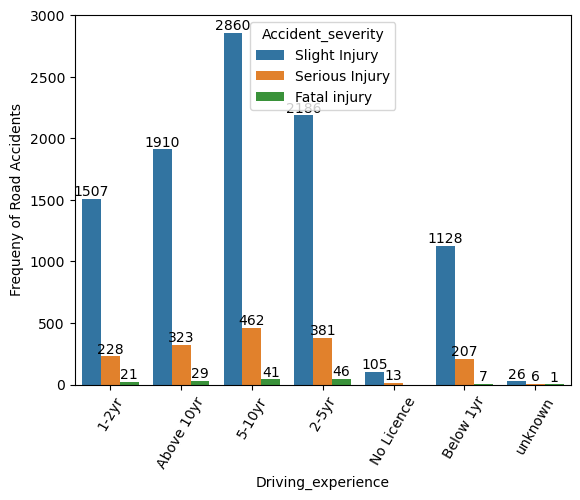

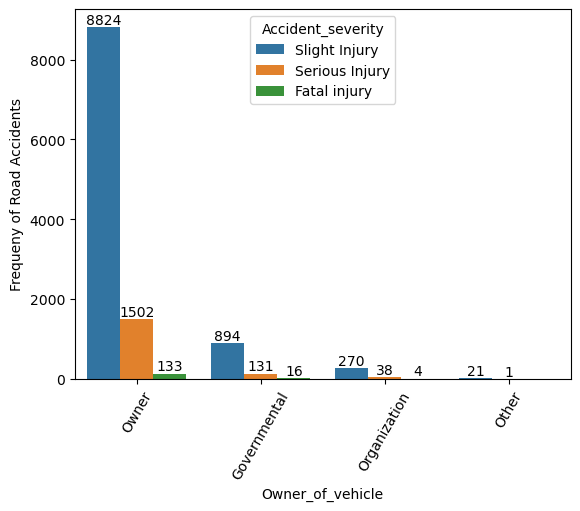

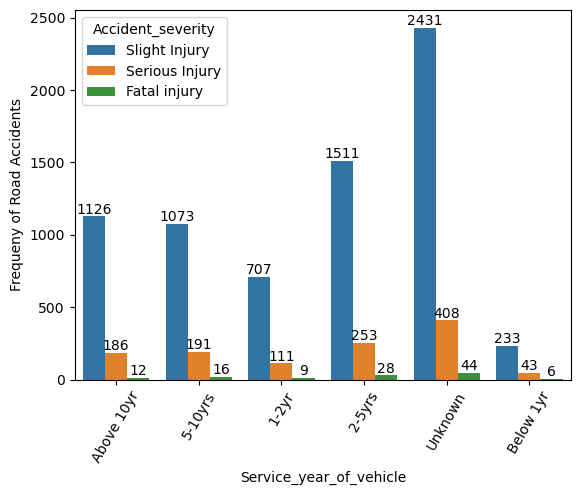

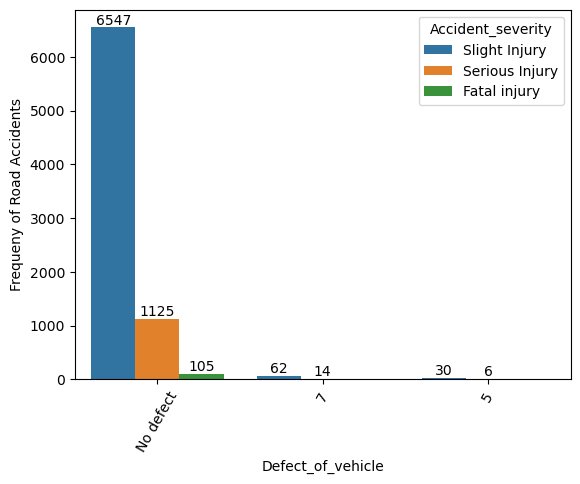

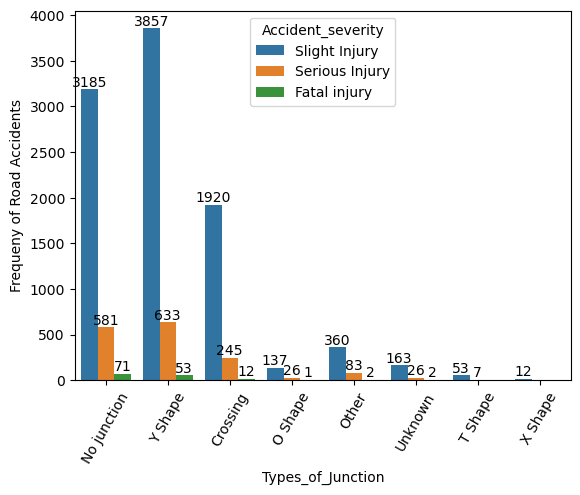

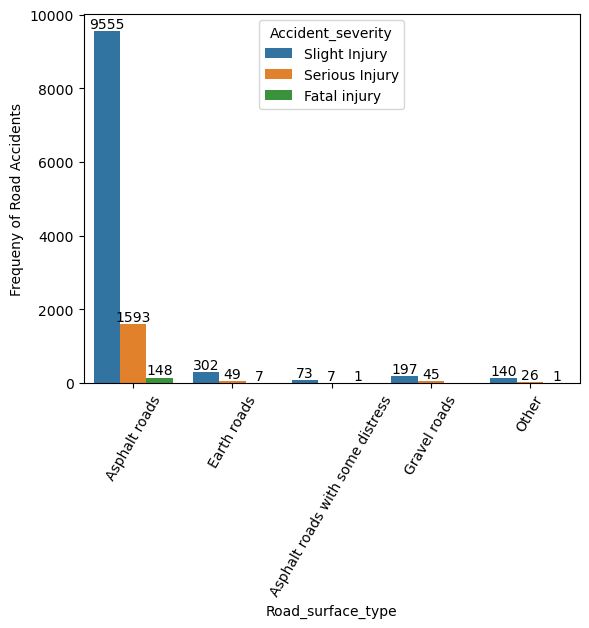

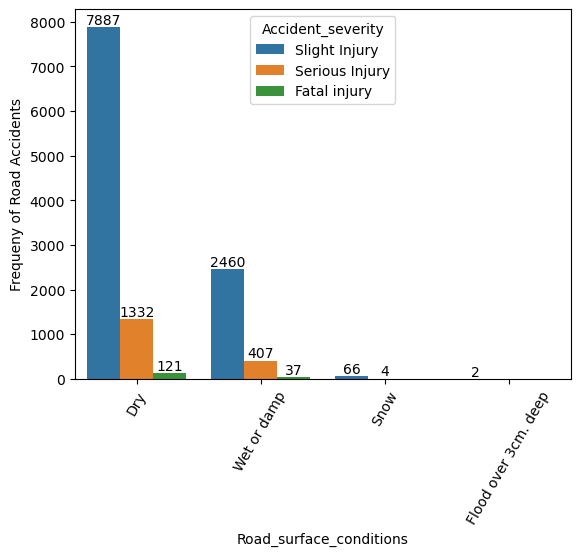

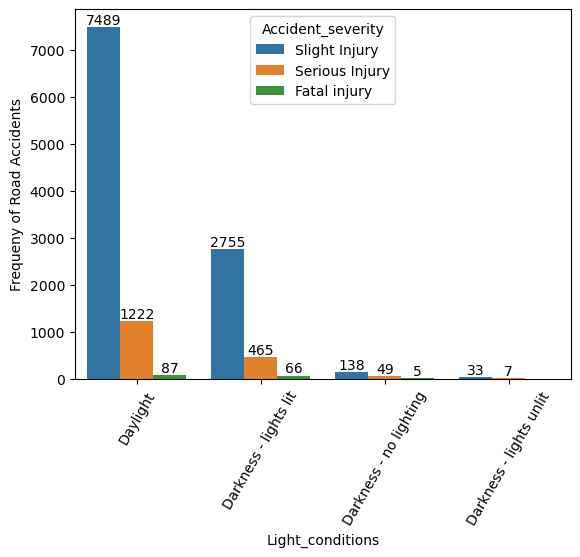

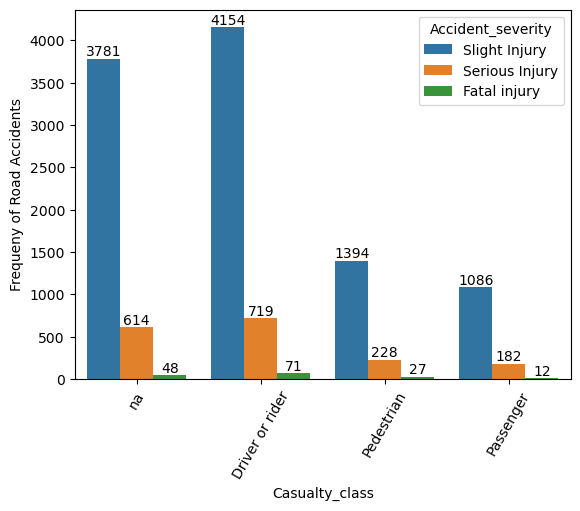

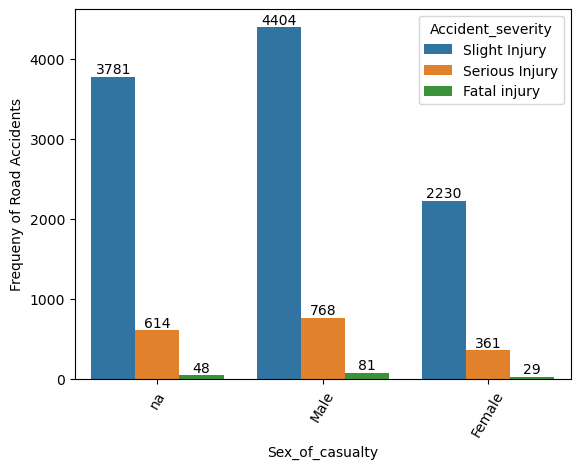

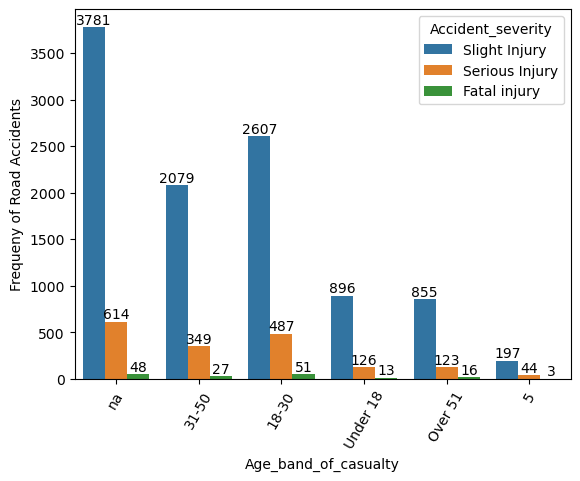

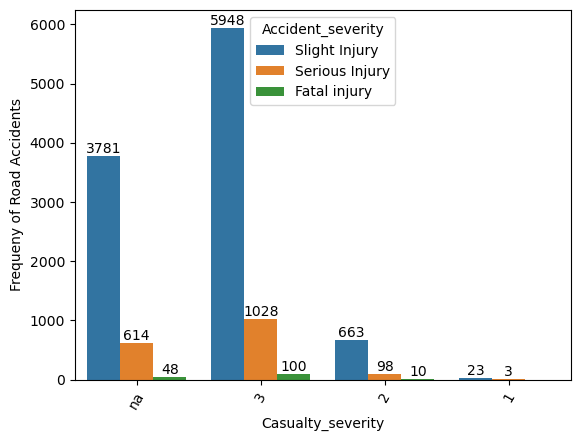

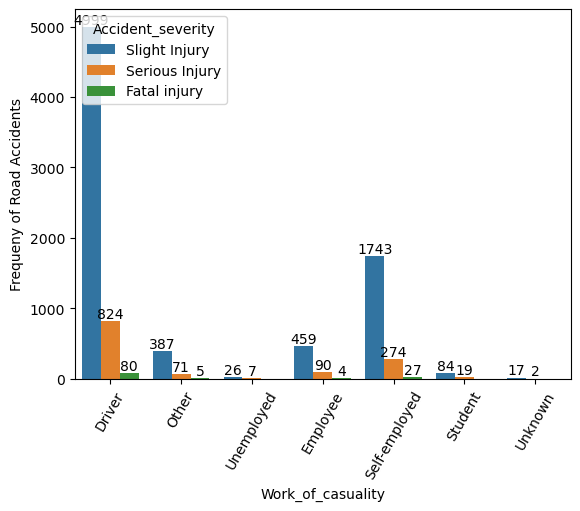

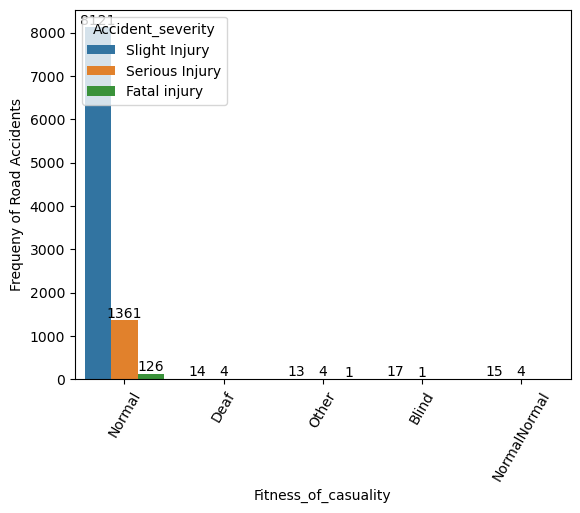

In [18]:
for col in categorical_columns_for_vertical_bar_chart:
    barchartplot(col)

## Horizontal Bar Chart

In [19]:
#Group all the categorical columns that needs to be summarized via horizontal bar chart
categorical_columns_for_horizontal_bar_chart = ['Type_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 
                                                'Road_allignment','Type_of_collision', 'Vehicle_movement', 'Cause_of_accident'
                                               ]

#define function for plotting horizontal bar chart for the selected categorical columns
#the horizontal bar chart displays the count of road accidents for each values within the targeted columns 
#each of the values within the targeted columns is further grouped by accidents' severity
def plot_horizontal_bar_chart(column):
    ax = sns.countplot(data=new_df, y=column, hue='Accident_severity')
    plt.xlabel(f'{column}')
    plt.ylabel('Frequency of Road Accidents')
    plt.legend(loc='lower right')
    
    #Show the values label for each of the bar
    for container in ax.containers:
        ax.bar_label(container)
    
    plt.show()

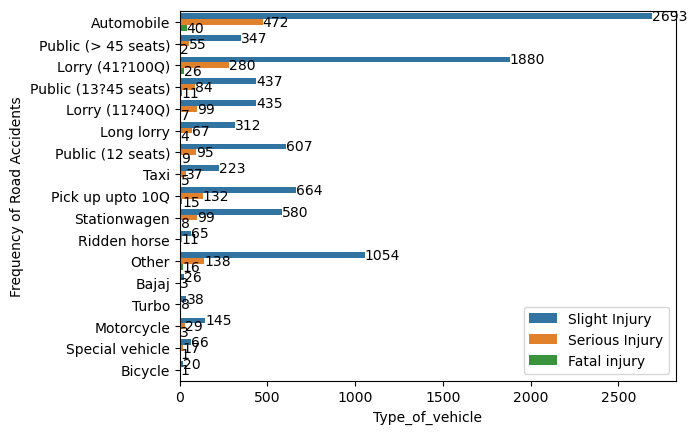

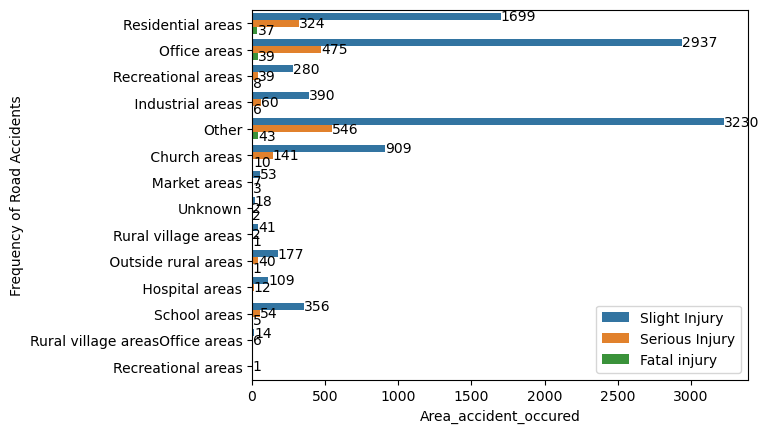

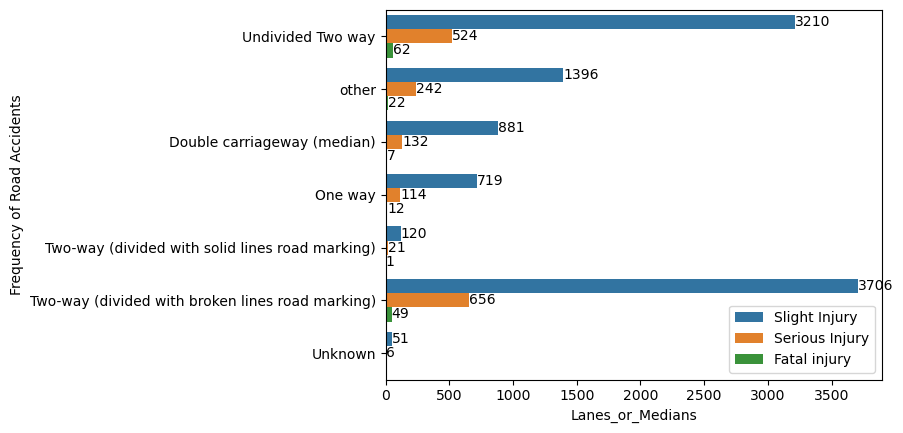

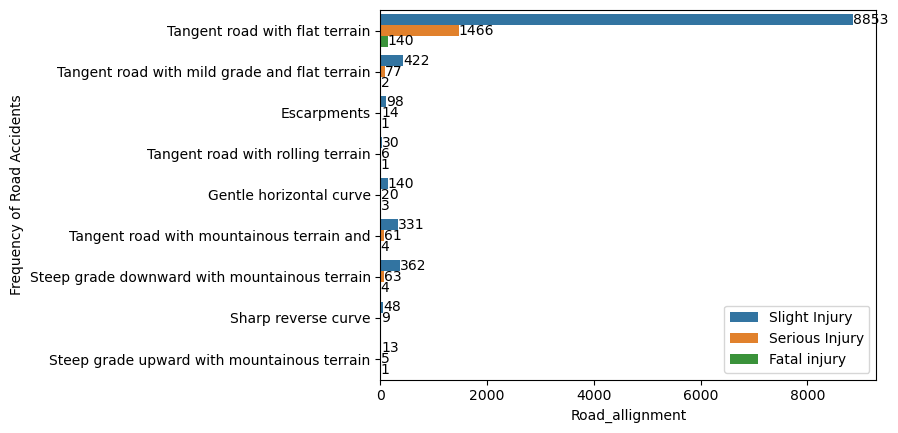

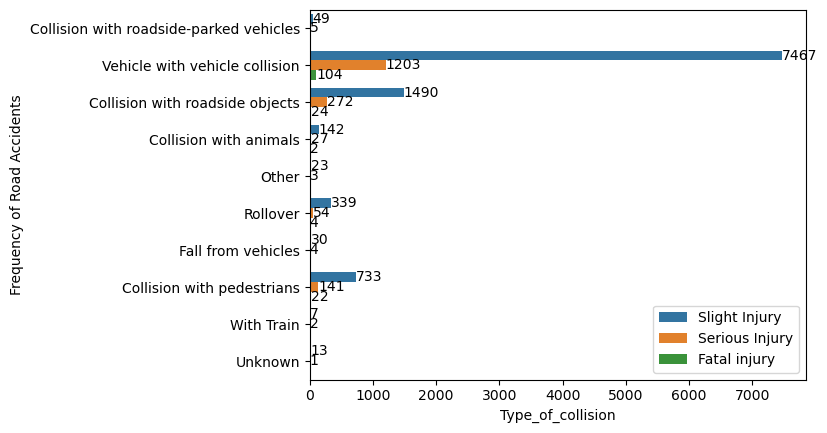

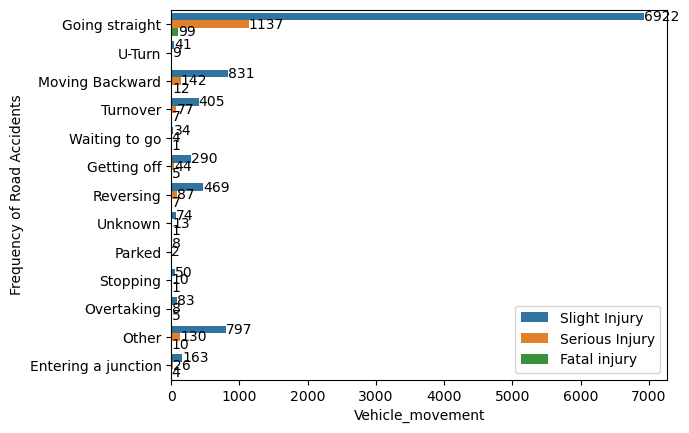

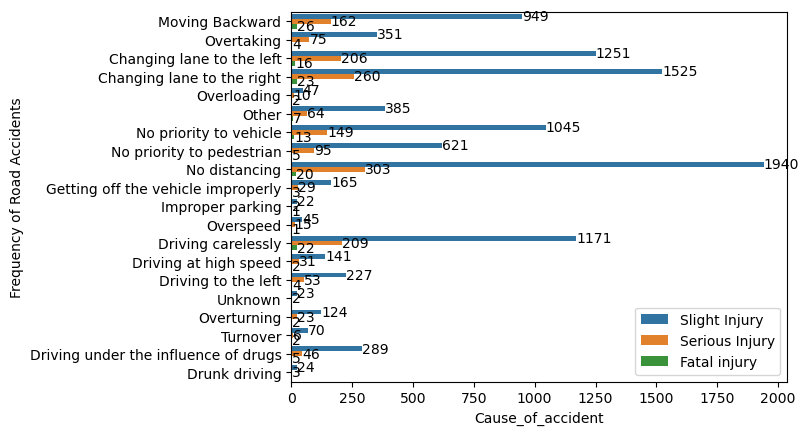

In [20]:
#Loop through the list of categorical columns to be summarized in horizontal bar chart by passing it to defined function
for column in categorical_columns_for_horizontal_bar_chart:
    plot_horizontal_bar_chart(column)


## Categorical Scatterplot

In [21]:
#define function for plotting categorical scatterplot
def plot_categorical_scatterplot(column):
    sns.stripplot(data=new_df, x='Number_of_casualties', y=column)
    plt.xlabel('The Number of Casualties')
    plt.ylabel(f'{column}')
    plt.show()

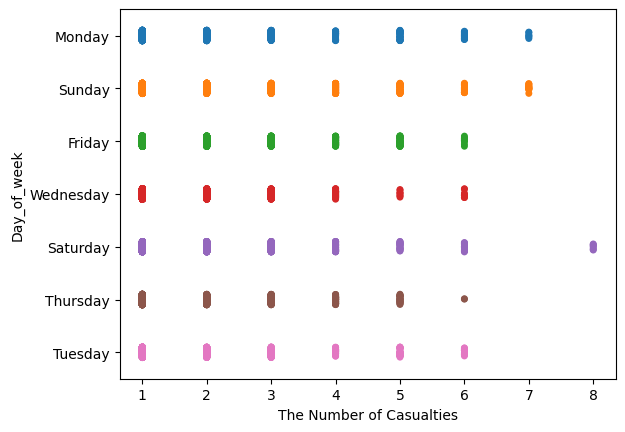

In [22]:
#store all the categorical columns that needs to be displayed for its number of casualties in scatter plot
categorical_scatterplot_columns = ['Day_of_week']

#Loop through the list of categorical columns to be summarized in categorical scatter plot by passing it to defined function
for column in categorical_scatterplot_columns:
    plot_categorical_scatterplot(column)

## Boxplot

In [23]:
#define function for plotting categorical scatterplot
def plot_boxplot(column):
    sns.catplot(data=new_df, y=column, x='Number_of_casualties', kind='box')
    plt.xlabel('The Number of Casualties')
    plt.ylabel(f'{column}')
    plt.show()

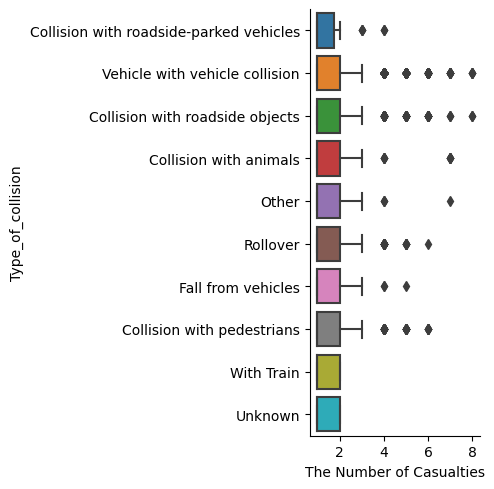

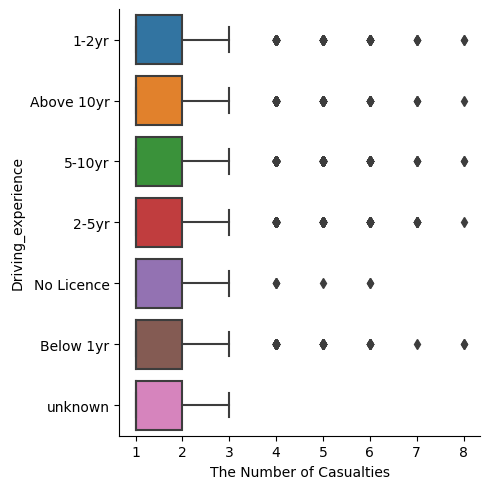

In [24]:
#store all the categorical columns that needs to be displayed for its number of casualties in boxplot
boxplot_columns = ['Type_of_collision', 'Driving_experience']

#Loop through the list of categorical columns to be summarized in boxplot by passing it to defined function
for column in boxplot_columns:
    plot_boxplot(column)

## Point Plot

In [25]:
#define function for plotting point plot
def plot_point_plot(column):
    sns.catplot(data=new_df, y=column, x='Number_of_casualties', kind='point')
    plt.xlabel('The Number of Casualties')
    plt.ylabel(f'{column}')
    plt.show()

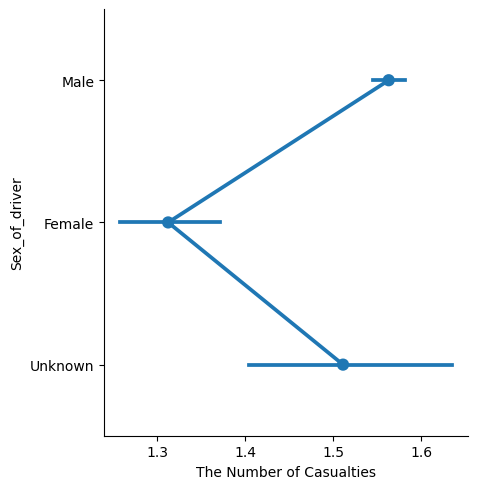

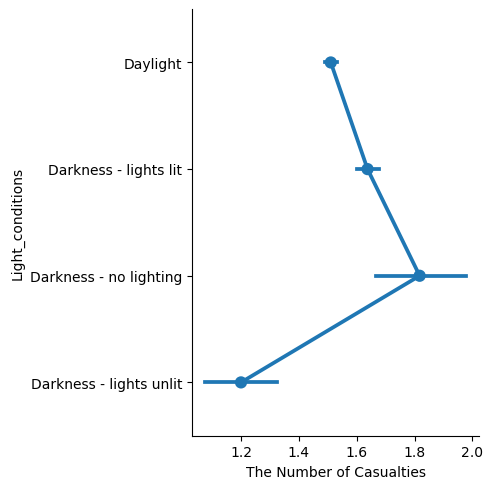

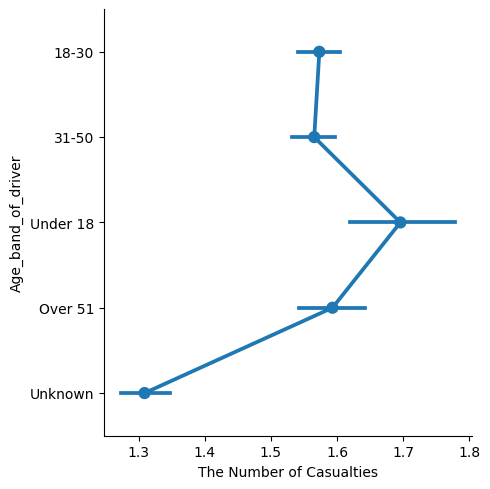

In [26]:
#store all the categorical columns that needs to be displayed for its number of casualties in point plot
point_plot_columns = ['Sex_of_driver', 'Light_conditions', 'Age_band_of_driver']

#Loop through the list of categorical columns to be summarized in point plot by passing it to defined function
for column in point_plot_columns:
    plot_point_plot(column)

## Scatter plot

<AxesSubplot:xlabel='Number_of_vehicles_involved', ylabel='Number_of_casualties'>

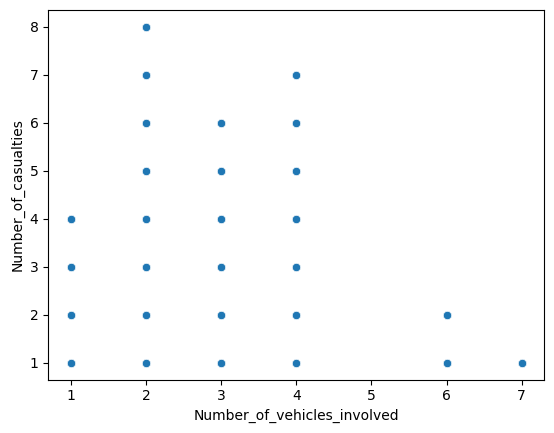

In [27]:
sns.scatterplot(x='Number_of_vehicles_involved', y='Number_of_casualties', data=new_df)

## Pie Chart

In [28]:
#define function for plotting pie chart
def plot_pie_chart(column):
    number_of_casualties_by_column = new_df.groupby([column])[[column, 'Number_of_casualties']].sum()
    slices = number_of_casualties_by_column['Number_of_casualties']
    labels = number_of_casualties_by_column.index
    plt.pie(slices, labels = labels, autopct='%1.1f%%', wedgeprops={'edgecolor':'black'})
    plt.title(f'Count of Number of Casualties by {column}')
    plt.style.use('ggplot')
    plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_8576\2026740126.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  number_of_casualties_by_column = new_df.groupby([column])[[column, 'Number_of_casualties']].sum()


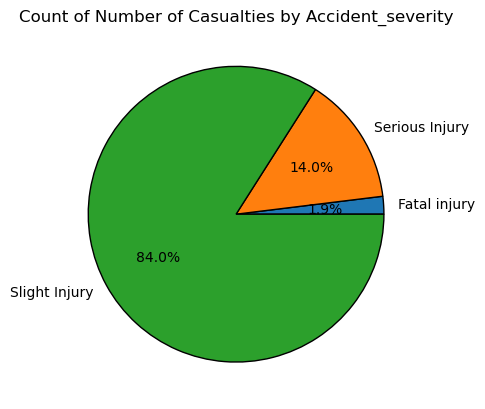

C:\Users\Acer\AppData\Local\Temp\ipykernel_8576\2026740126.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  number_of_casualties_by_column = new_df.groupby([column])[[column, 'Number_of_casualties']].sum()


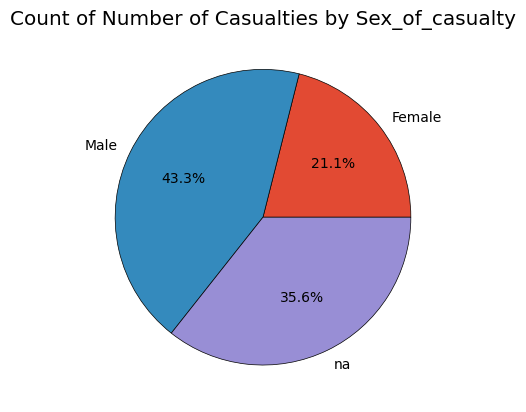

C:\Users\Acer\AppData\Local\Temp\ipykernel_8576\2026740126.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  number_of_casualties_by_column = new_df.groupby([column])[[column, 'Number_of_casualties']].sum()


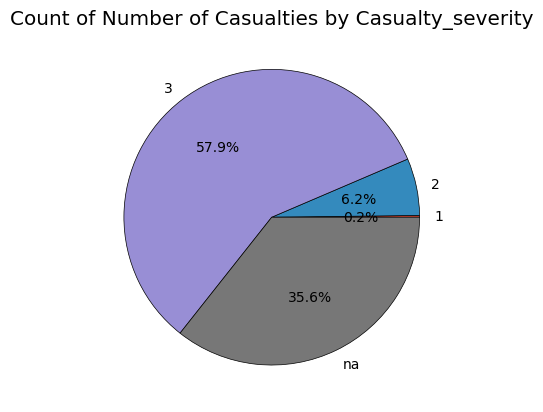

C:\Users\Acer\AppData\Local\Temp\ipykernel_8576\2026740126.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  number_of_casualties_by_column = new_df.groupby([column])[[column, 'Number_of_casualties']].sum()


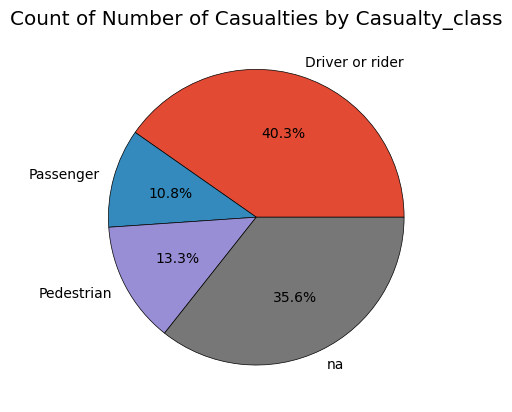

In [29]:
#store all the categorical columns that needs to be displayed for its number of casualties in pie chart
pie_chart_columns = ['Accident_severity', 'Sex_of_casualty', 'Casualty_severity', 'Casualty_class']

#Loop through the list of categorical columns to be summarized in pie chart by passing it to defined function
for column in pie_chart_columns:
    plot_pie_chart(column)

<AxesSubplot:xlabel='Age_band_of_casualty', ylabel='Number_of_casualties'>

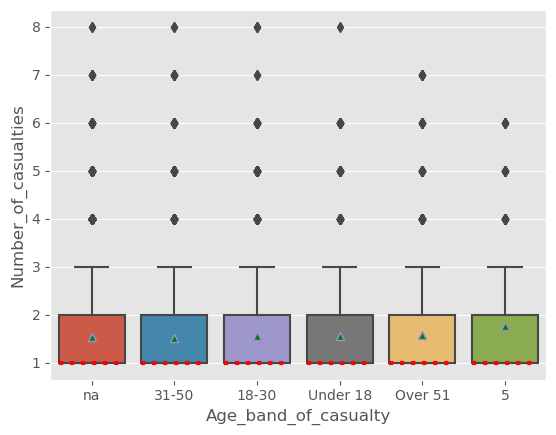

In [30]:
sns.boxplot(data = new_df, y = 'Number_of_casualties', x = 'Age_band_of_casualty',
            medianprops={'color': 'red', 'lw': 3, 'ls': ':'}, showmeans=True,
            meanprops={'markerfacecolor': 'green'})

<AxesSubplot:xlabel='Number_of_casualties', ylabel='Type_of_collision'>

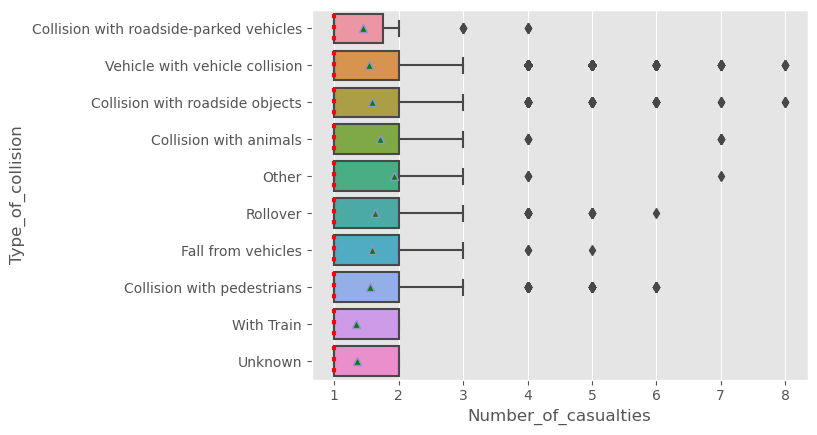

In [31]:
sns.boxplot(data = new_df, x = 'Number_of_casualties', y = 'Type_of_collision',
            medianprops={'color': 'red', 'lw': 3, 'ls': ':'}, showmeans=True,
            meanprops={'markerfacecolor': 'green'})

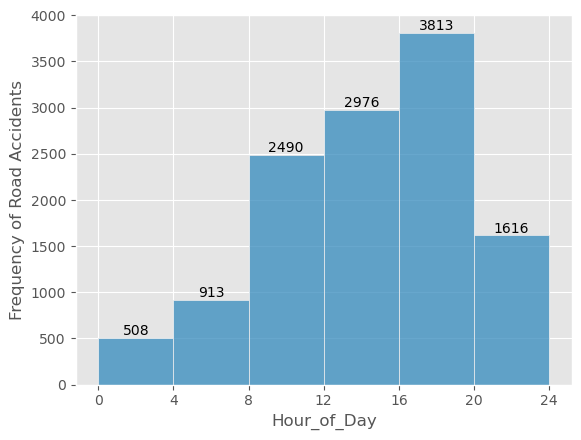

In [32]:
ax = sns.histplot(data=new_df, x='Hour_of_Day', binwidth=4)
plt.xticks([0, 4, 8, 12, 16, 20, 24])
plt.ylabel('Frequency of Road Accidents')
plt.style.use('ggplot')

for container in ax.containers:
        ax.bar_label(container)
        
plt.show()